# Carregar dados

In [61]:
import pandas as pd

# # Mostrar mais colunas
pd.set_option("display.max_columns", 100)
pd.set_option('display.max_colwidth', 100)

df = pd.read_parquet("./output/gold/rais_TODOS_ANOS_comJoin_RAIS_VINC_PUB.parquet.gzip")

qnt_full = len(df)
print(f"""
Quantidade docs: {qnt_full}
""")

df.head(2)



Quantidade docs: 384175



,ano,sigla_uf_id,sigla_uf,remuneracao_media,desligamento,idade,ocupacao_id,ocupacao,sexo_id,sexo,raca_cor_id,raca_cor
0,2019,11,MS,997.99,0,17,317210,Analista de service desk,1,Masculino,2,Branca
1,2019,11,MS,0.00,0,36,212420,Analista de suporte,1,Masculino,2,Branca


In [62]:
df_2019 = df[df["ano"] == 2019]
df_2020 = df[df["ano"] == 2020]

print(f"""
Quantidade
df_2019: {len(df_2019)}
df_2020: {len(df_2020)}
""")



Quantidade
df_2019: 162073
df_2020: 222102



# Verificando Dados Gerais

In [63]:
df.describe()

,ano,sigla_uf_id,remuneracao_media,desligamento,idade,ocupacao_id,sexo_id,raca_cor_id
count,384175.000000,384175.000000,384175.000000,384175.000000,384175.000000,384175.000000,384175.000000,384175.000000
mean,2019.578127,18.448993,4785.165768,0.278665,33.430012,248348.551454,1.183627,9.026144
std,0.493859,7.259085,4988.169084,0.448343,9.375189,49735.833043,0.387180,20.311097
min,2019.000000,0.000000,0.000000,0.000000,14.000000,212205.000000,1.000000,1.000000
25%,2019.000000,11.000000,1708.455000,0.000000,26.000000,212405.000000,1.000000,2.000000
50%,2020.000000,22.000000,3200.050000,0.000000,32.000000,212420.000000,1.000000,2.000000
75%,2020.000000,25.000000,6231.990000,1.000000,38.000000,317110.000000,1.000000,8.000000
max,2020.000000,26.000000,120828.570000,1.000000,85.000000,317210.000000,2.000000,99.000000


# Dados por Estado, Sexo

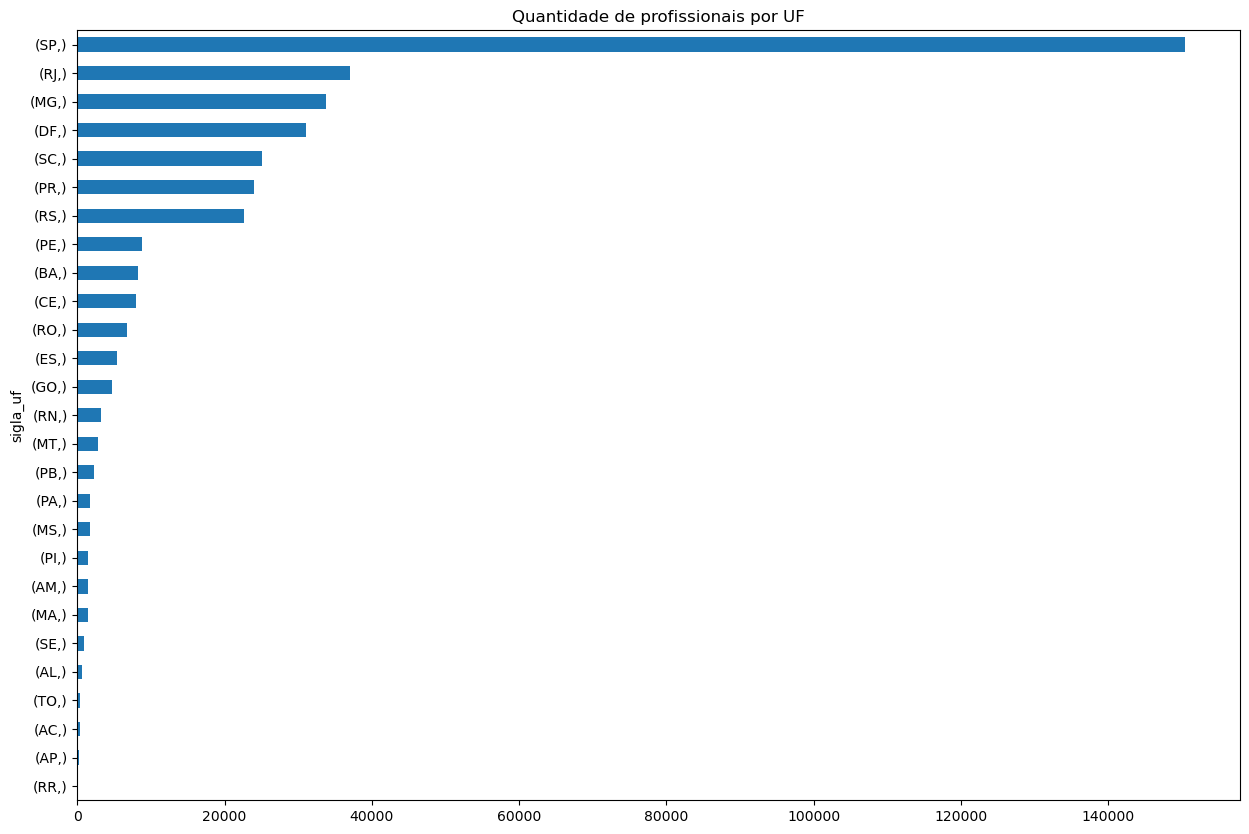

In [64]:
graf_sigla_uf = df[["sigla_uf"]].value_counts(ascending=True).plot(kind="barh", 
                                                                   figsize=(15, 10), 
                                                                   title="Quantidade de profissionais por UF")
graf_sigla_uf.get_figure().savefig("./output/gold/graf_sigla_uf.png")

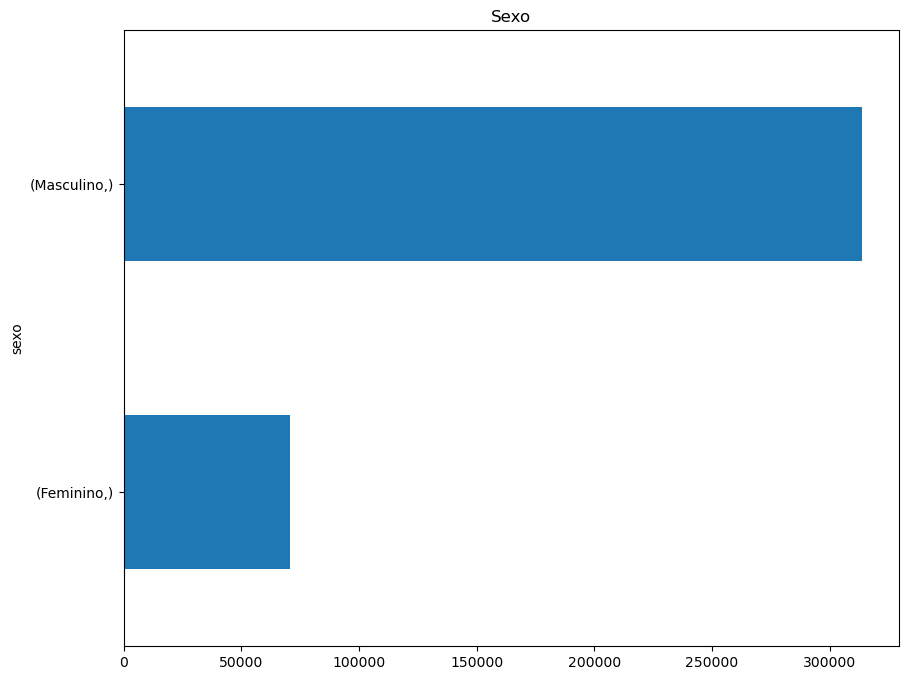

In [65]:
graf_sexo = df[["sexo"]].value_counts(ascending=True).plot(kind="barh", 
                                                                   figsize=(10, 8), 
                                                                   title="Sexo")
graf_sexo.get_figure().savefig("./output/gold/graf_sexo.png")


# Analisando

In [66]:
# show df grouping by ano, and from this, show the group by sexo
df.groupby(["ano", "sexo"]).size().reset_index(name="qnt")

,ano,sexo,qnt
0,2019,Feminino,25888
1,2019,Masculino,136185
2,2020,Feminino,44657
3,2020,Masculino,177445


### Salários

Por: ANO 2019, Sexo, Região

In [113]:
# df_ana = df_2019[["sigla_uf", "desligamento", "ocupacao", "sexo", "remuneracao_media"]]
df_ana = df_2020[["sigla_uf", "desligamento", "ocupacao", "sexo", "remuneracao_media"]]
df_ana


,sigla_uf,desligamento,ocupacao,sexo,remuneracao_media
162073,MS,0,Operador de computador (inclusive microcomputador,Masculino,1843.44
162074,MS,0,Operador de computador (inclusive microcomputador,Masculino,1606.26
162075,MS,0,Operador de computador (inclusive microcomputador,Masculino,1756.35
162076,MS,0,Desenvolvedor de sustentação de ti (técnico),Masculino,2417.00
162077,MS,0,Analista de comunicação (teleprocessamento),Masculino,4050.00
...,...,...,...,...,...
384170,RS,1,Analista de comunicação (teleprocessamento),Feminino,5476.49
384171,RS,1,Analista de suporte,Feminino,2258.49
384172,RS,1,Desenvolvedor de sustentação de ti (técnico),Feminino,6300.00
384173,RS,1,Analista de comunicação (teleprocessamento),Feminino,4161.69


In [114]:
# SEPARATE sigla_uf by regions

# https://pt.wikipedia.org/wiki/Regi%C3%B5es_do_Brasil
# https://pt.wikipedia.org/wiki/Unidades_federativas_do_Brasil
REGIOES = {
    "Norte": ["AC", "AP", "AM", "PA", "RO", "RR", "TO"],
    "Nordeste": ["AL", "BA", "CE", "MA", "PB", "PE", "PI", "RN", "SE"],
    "Centro-Oeste": ["GO", "MT", "MS"],
    "Sudeste": ["ES", "MG", "RJ", "SP"],
    "Sul": ["PR", "RS", "SC"]
}

In [115]:
df_ana_r = df_ana.copy()

# add col Regioes to df_ana with REGIOES
for regiao, siglas in REGIOES.items():
    df_ana_r.loc[df_ana["sigla_uf"].isin(
        siglas), "regiao"] = regiao

df_ana_r

,sigla_uf,desligamento,ocupacao,sexo,remuneracao_media,regiao
162073,MS,0,Operador de computador (inclusive microcomputador,Masculino,1843.44,Centro-Oeste
162074,MS,0,Operador de computador (inclusive microcomputador,Masculino,1606.26,Centro-Oeste
162075,MS,0,Operador de computador (inclusive microcomputador,Masculino,1756.35,Centro-Oeste
162076,MS,0,Desenvolvedor de sustentação de ti (técnico),Masculino,2417.00,Centro-Oeste
162077,MS,0,Analista de comunicação (teleprocessamento),Masculino,4050.00,Centro-Oeste
...,...,...,...,...,...,...
384170,RS,1,Analista de comunicação (teleprocessamento),Feminino,5476.49,Sul
384171,RS,1,Analista de suporte,Feminino,2258.49,Sul
384172,RS,1,Desenvolvedor de sustentação de ti (técnico),Feminino,6300.00,Sul
384173,RS,1,Analista de comunicação (teleprocessamento),Feminino,4161.69,Sul


In [116]:
# df_ana_r remove where remuneracao_media = 0
df_ana_r = df_ana_r[df_ana_r["remuneracao_media"] > 0]

# Remun. Média

In [122]:
# group df_ana_r by sigla_uf and add a column with mean, max, min, std
df_ana_f = df_ana_r.groupby(["regiao", "sexo"]).agg(
    {"remuneracao_media": ["mean", "min", "max", "std"]})

# round values to 2 decimal places
df_ana_f = df_ana_f.round(2)

# export to table in latex to 2 decimal places
df_ana_f.reset_index().to_latex("./output/silver/df_ana_f.tex", index=False)

df_ana_f


remuneracao_media                            
                                    mean     min        max      std
regiao       sexo                                                   
Centro-Oeste Feminino            2709.50  315.69   36437.56  3365.90
             Masculino           3070.05  311.70   45579.51  2661.07
Nordeste     Feminino            3161.25  313.86   43623.47  3513.94
             Masculino           3481.98  311.70   54084.93  3393.45
Norte        Feminino            3741.41  337.10   51863.85  3419.64
             Masculino           3161.25  313.59   77710.46  3429.92
Sudeste      Feminino            4386.02  312.84   70360.39  4287.26
             Masculino           5285.72  311.94  120581.45  5035.27
Sul          Feminino            3275.24  313.82   58268.44  2953.85
             Masculino           3942.60  312.05   62973.81  3347.73

# Demissões

In [118]:
# group df_ana_r by sigla_uf and add a column with mean, max, min, std
df_ana_f = df_ana_r.groupby(["regiao", "sexo"]).agg(
    {"desligamento": ["count"]})

# round values to 2 decimal places
df_ana_f = df_ana_f.round(2)

# export to table in latex to 2 decimal places
df_ana_f.reset_index().to_latex("./output/silver/df_ana_f.tex", index=False)

df_ana_f


desligamento
                              count
regiao       sexo                  
Centro-Oeste Feminino          1014
             Masculino         4892
Nordeste     Feminino          3939
             Masculino        17567
Norte        Feminino          4031
             Masculino         4085
Sudeste      Feminino         24390
             Masculino       103504
Sul          Feminino          7720
             Masculino        30439

# Cargos

In [119]:
# from df_ana, count the number of ocupacao by sexo
df_ana.groupby(["ocupacao", "sexo"]).size().reset_index()


,ocupacao,sexo,0
0,Administrador de rede e de sistemas computacionais,Feminino,331
1,Administrador de rede e de sistemas computacionais,Masculino,2398
2,Administrador de sistemas computacionais,Feminino,754
3,Administrador de sistemas computacionais,Masculino,2850
4,Analista de comunicação (teleprocessamento),Feminino,3240
5,Analista de comunicação (teleprocessamento),Masculino,9553
6,Analista de desenvolvimento de software,Feminino,14535
7,Analista de desenvolvimento de software,Masculino,63493
8,Analista de service desk,Feminino,4873
9,Analista de service desk,Masculino,17452


# Outros

In [120]:
df_ana[df_ana["sigla_uf"].isin(REGIOES["Norte"])].describe()


,desligamento,remuneracao_media
count,8361.000000,8361.000000
mean,0.244349,3348.327741
std,0.429726,3435.752022
min,0.000000,0.000000
25%,0.000000,1418.980000
50%,0.000000,2506.070000
75%,0.000000,3908.880000
max,1.000000,77710.460000


In [121]:
# group df_ana by sigla_uf and show mean of valor_remuneracao_media

df_ana.groupby(["sigla_uf", "sexo"]).mean().reset_index()

TypeError: Could not convert Analista de service deskOperador de computador (inclusive microcomputadorAnalista de service deskAnalista de suporteOperador de computador (inclusive microcomputadorOperador de computador (inclusive microcomputadorAnalista de service deskAnalista de service deskAnalista de service deskOperador de computador (inclusive microcomputadorAnalista de service deskAnalista de comunicação (teleprocessamento)Analista de service deskAnalista de suporteAnalista de service deskAnalista de suporteAnalista de service deskAnalista de desenvolvimento de softwareAnalista de suporteAnalista de desenvolvimento de softwareAnalista de suporteAnalista de suporteAnalista de suporteAnalista de suporteAnalista de suporteAnalista de suporteAnalista de suporteAnalista de suporteOperador de computador (inclusive microcomputadorAnalista de service deskOperador de computador (inclusive microcomputadorOperador de computador (inclusive microcomputadorOperador de computador (inclusive microcomputador to numeric

# Correlação entre colunas

- Correlação entre Ano, Estado, Idade, Ocupação, Sexo, Cor

In [ ]:
# https://stackoverflow.com/questions/48035381/correlation-among-multiple-categorical-variables-pandas

df_apenas_ids = df[[
    "ano", "sigla_uf_id", "idade", "ocupacao_id", "sexo_id", "raca_cor_id"]]

corr_an = df_apenas_ids.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
# corr_an = df_apenas_ids.corr()
corr_an

,ano,sigla_uf_id,idade,ocupacao_id,sexo_id,raca_cor_id
ano,1.000000,0.022736,-0.000615,-0.000845,0.052724,-0.013575
sigla_uf_id,0.022736,1.000000,-0.059076,-0.014747,0.023051,-0.212343
idade,-0.000615,-0.059076,1.000000,0.067848,0.023555,0.097914
ocupacao_id,-0.000845,-0.014747,0.067848,1.000000,-0.015581,-0.045122
sexo_id,0.052724,0.023051,0.023555,-0.015581,1.000000,0.084287
raca_cor_id,-0.013575,-0.212343,0.097914,-0.045122,0.084287,1.000000


Matriz de correlação: The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the median house value tends to go up when the median income goes up. When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a small negative correlation between

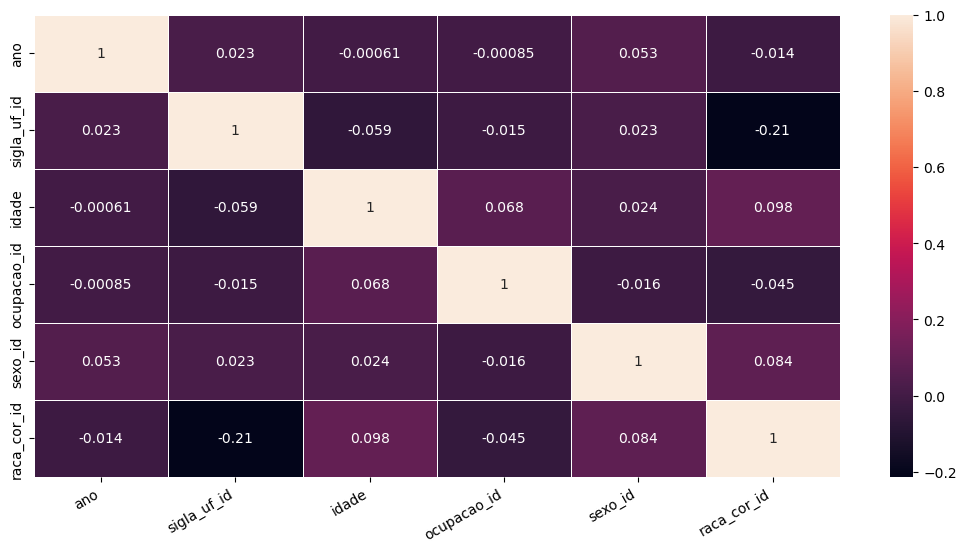

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 6))
sns.heatmap(corr_an, vmax=1, annot=True, linewidths=.5)
plt.xticks(rotation=30, horizontalalignment="right")
plt.show()


In [ ]:
# from pandas.plotting import scatter_matrix

# scatter_matrix(df_apenas_ids, figsize=(12, 8))

